https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

In [54]:
# import numpy, matplotlib, etc.
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# define plt settings
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["figure.figsize"] = (20,10)

In [55]:
Boston_df = pd.read_csv("BostonHousing.csv")

In [56]:
Boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [57]:
def add_plot (sub_plot, df, x_col, y_col, graph_color):
    graph_title = "{x_name} VS {y_name}"
    x= df[x_col]
    y= df[y_col]
    sub_plot.scatter(x,y,color=graph_color ,marker='*', label=graph_title.format(x_name = x_col, y_name = y_col))
    sub_plot.set(title='All VS medv', ylabel=y_col, xlabel=x_col)
    sub_plot.legend(loc='best')

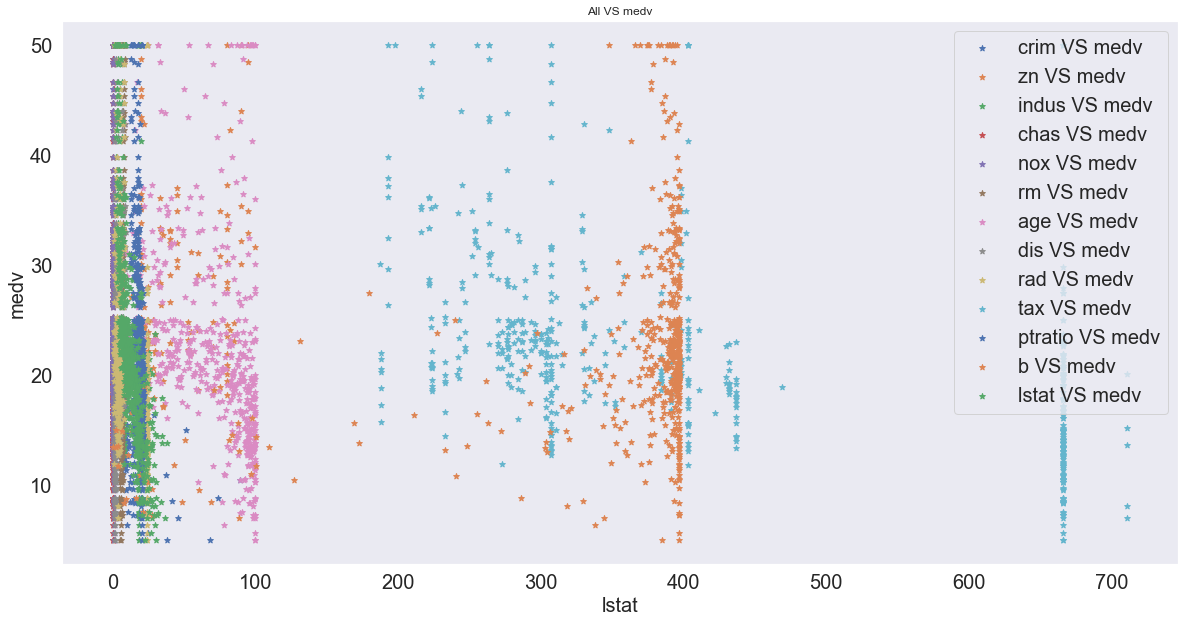

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)
color = "C{index}"

for idx, column in enumerate(Boston_df):
    if column != 'medv': add_plot(ax, Boston_df, column, 'medv', color.format(index=idx))
                                
plt.grid()
plt.show()

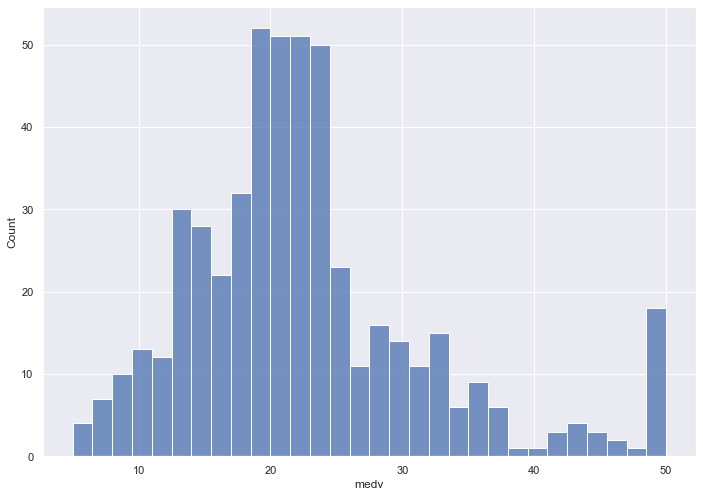

In [59]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(Boston_df['medv'], bins=30)
plt.show()

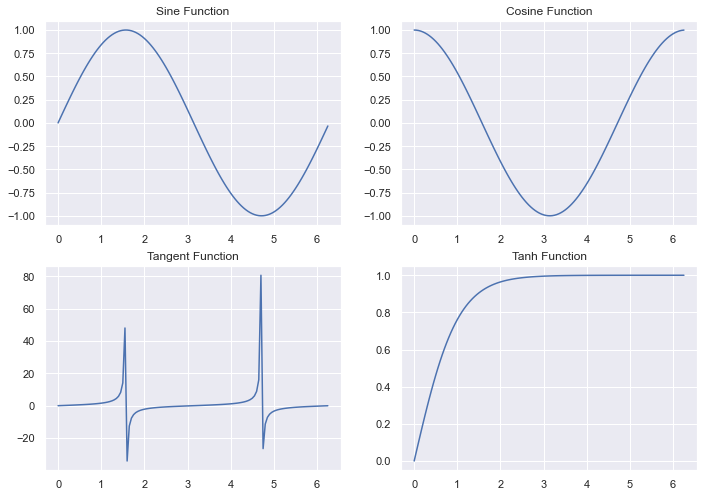

In [60]:
 
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()

In [61]:
import statsmodels as smf

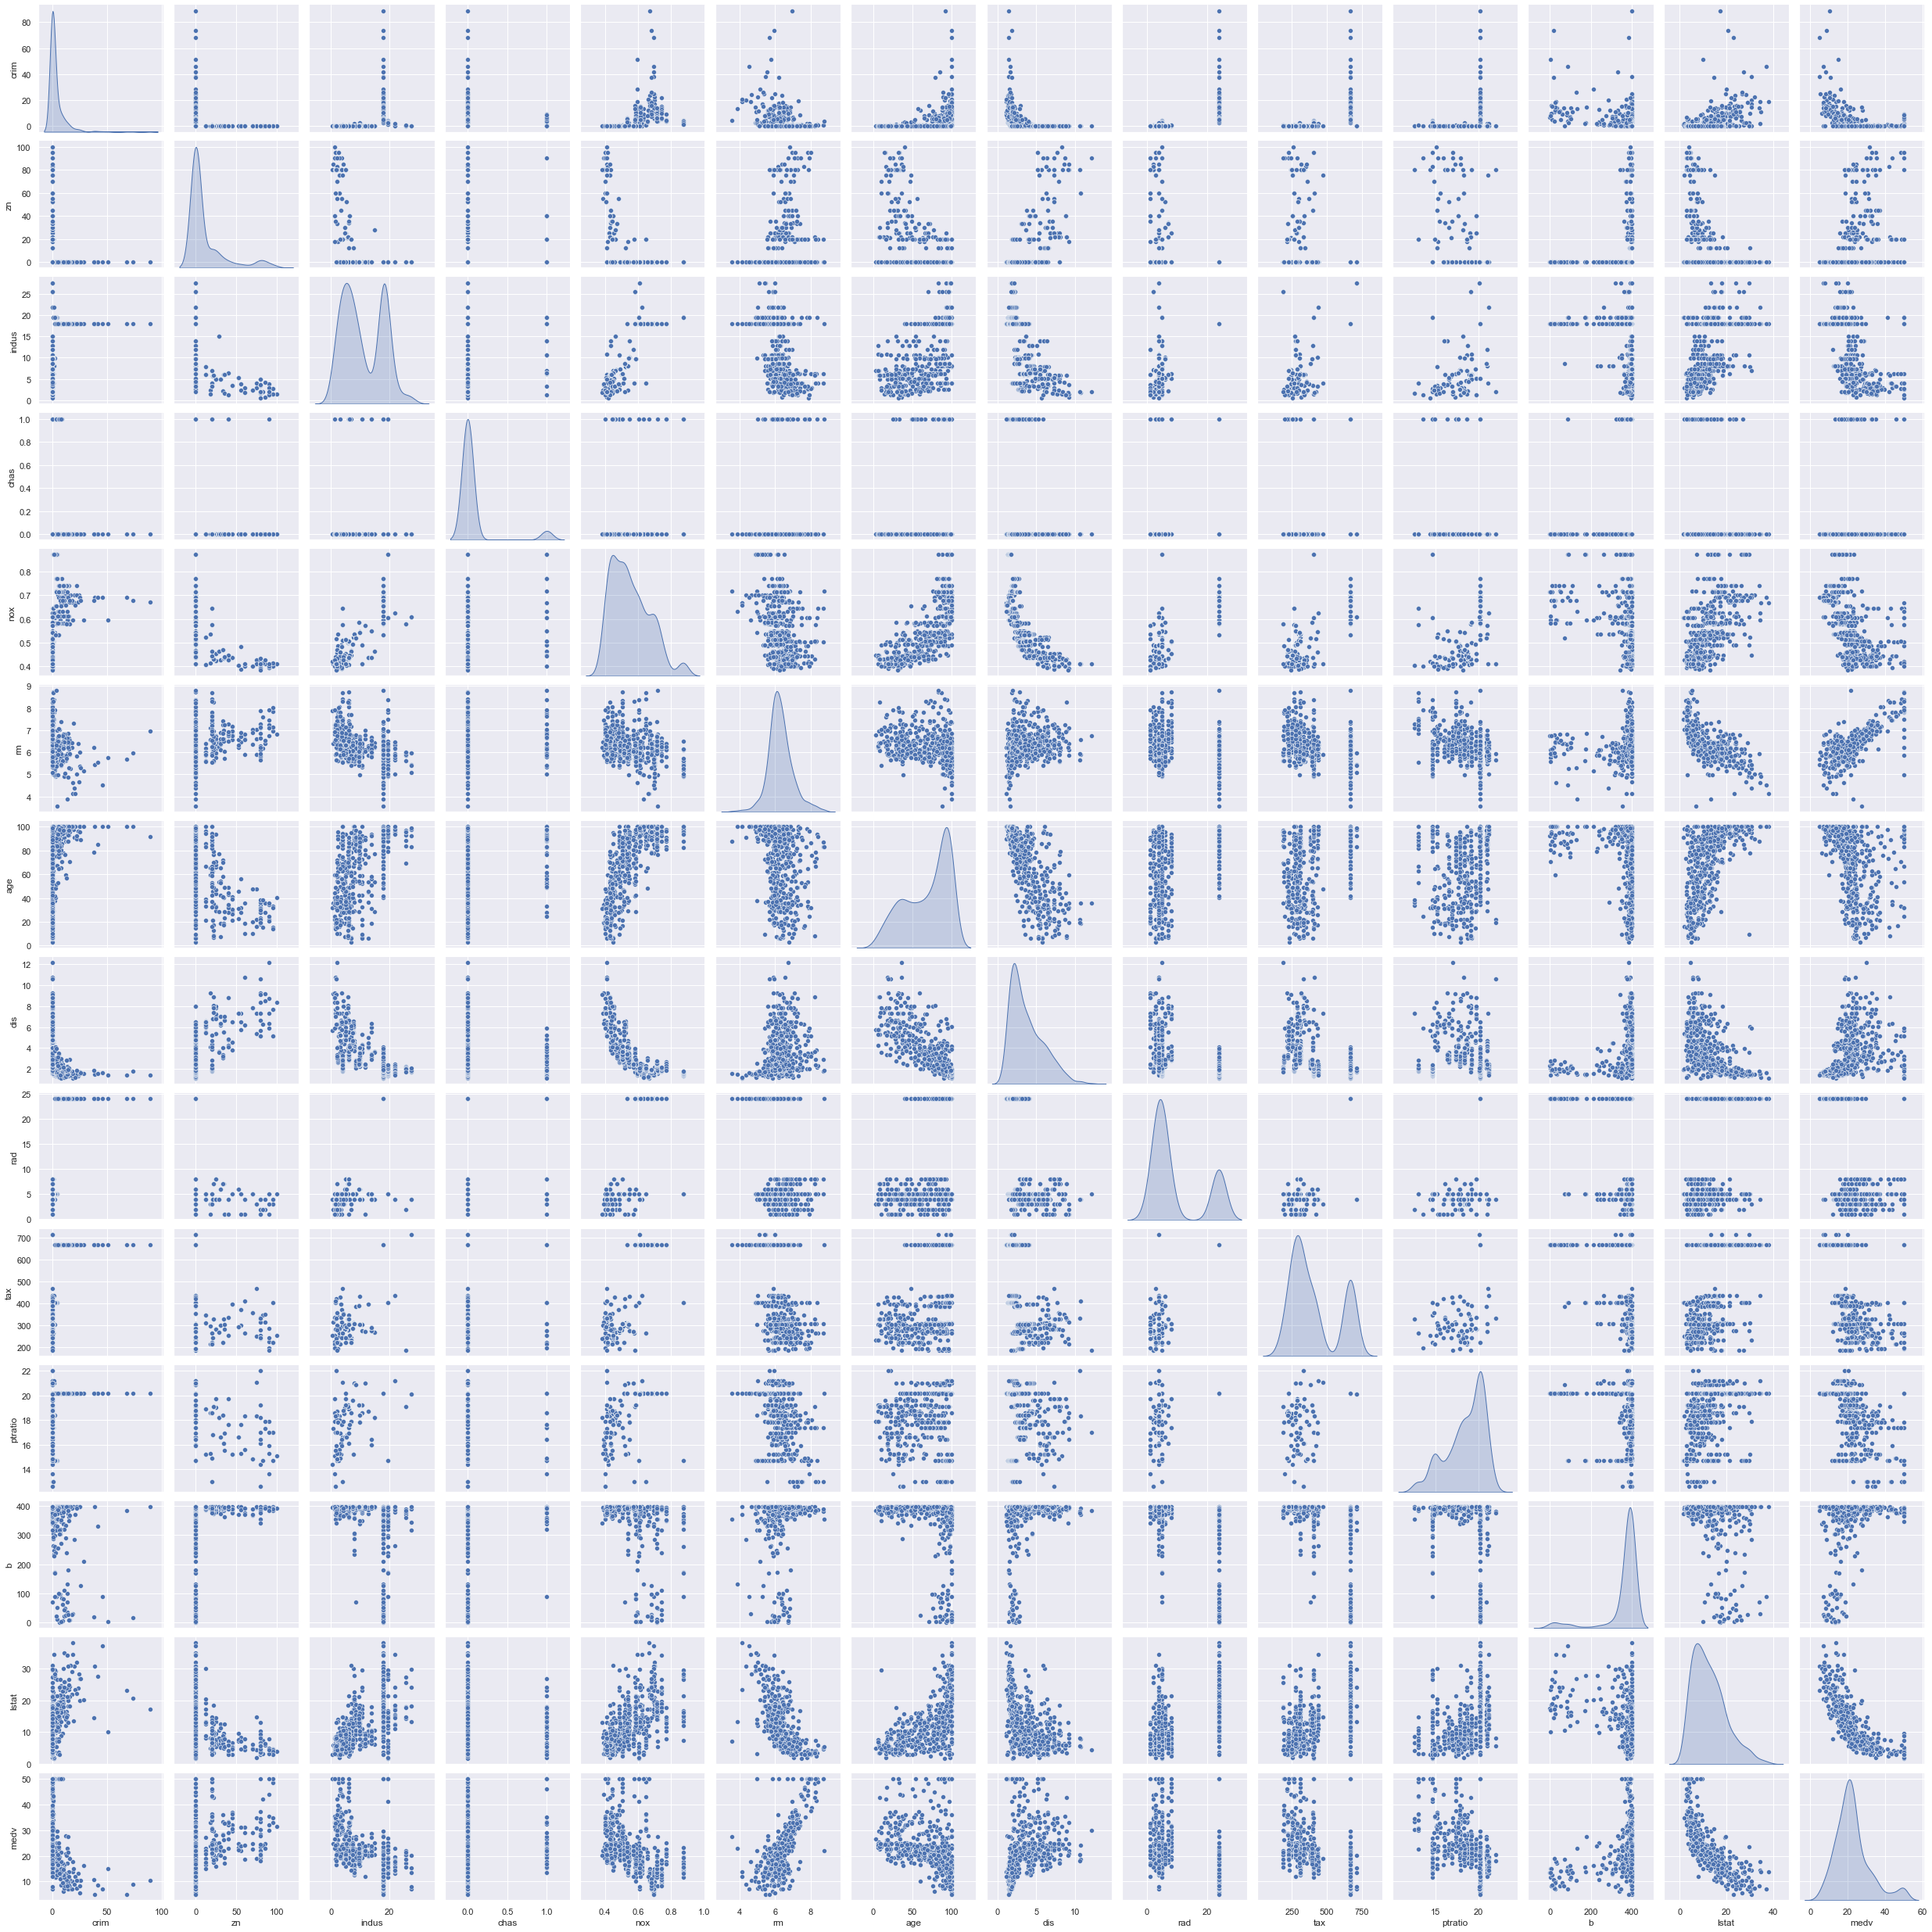

In [62]:
sns.pairplot(Boston_df, diag_kind='kde')

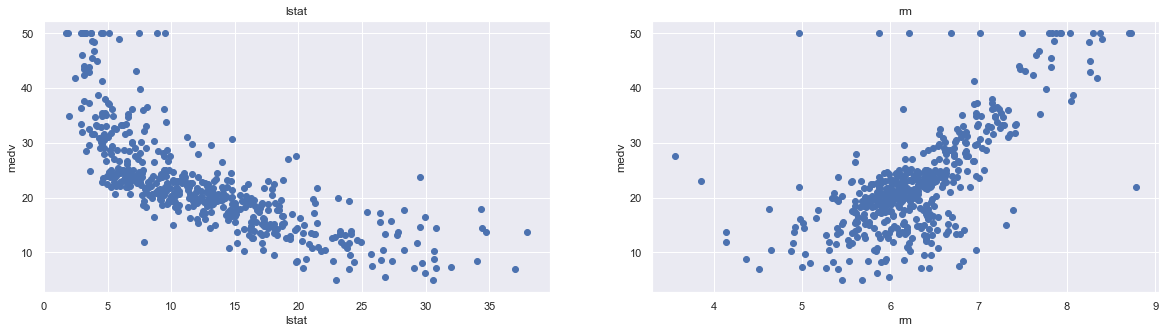

In [63]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = Boston_df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = Boston_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

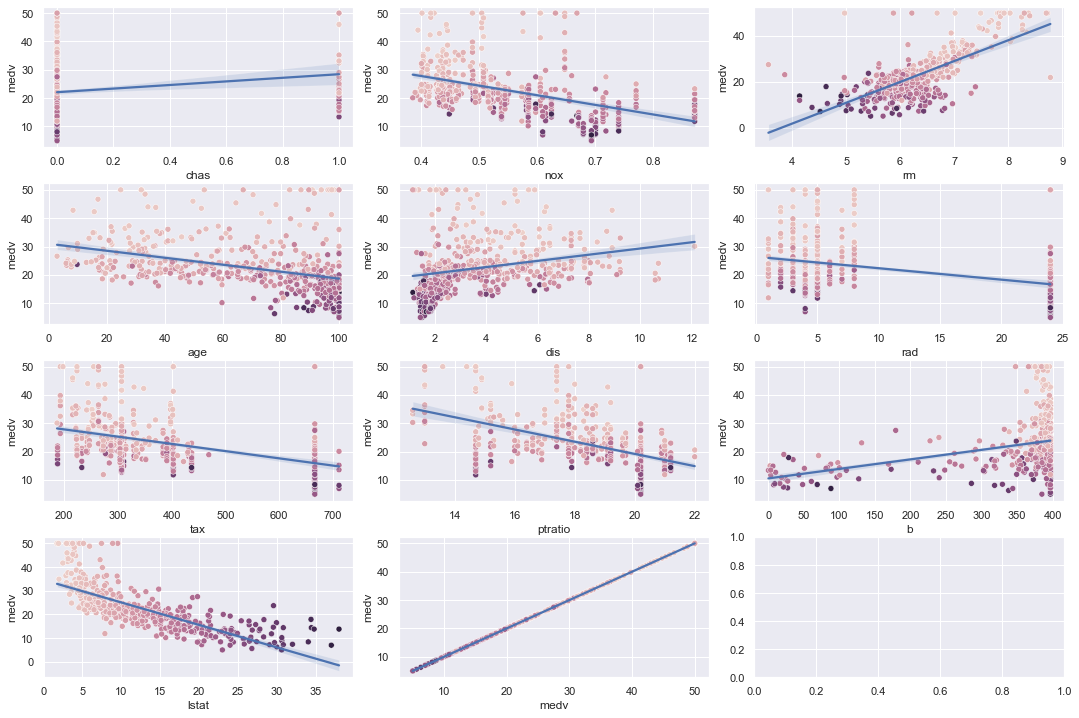

In [64]:
sns.set()

# define a function for plotting a single axis (predictor vs. medv)
def plot_pred_vs_medv(df, pos, axes, pos3):
  axes = axes.flatten()
  sns.scatterplot(data = df, x = df[df.columns[pos]], y = 'medv', hue = 'lstat', ax = axes[pos3], legend = False)
  sns.regplot(data = df, x = df[df.columns[pos]], y = 'medv', truncate = True, scatter = False, ax = axes[pos3])


# Define subplots
f,axes = plt.subplots(4,3,figsize = (15,10))

# Adjust the padding between and around subplots.
plt.tight_layout()
f.tight_layout()

# loop over predictors / axes
for pos in range(3,14):
    plot_pred_vs_medv(Boston_df, pos, axes, pos-3)

plt.show()    

Instead of many subplots, you can use Seaborn’s heatmap (heatmap) that show in a color-coded matrix all the correlations between all the features. 
https://pythonbasics.org/seaborn-heatmap/ 

In [65]:
corr_matrix = Boston_df.corr()
print(corr_matrix)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

<AxesSubplot:>

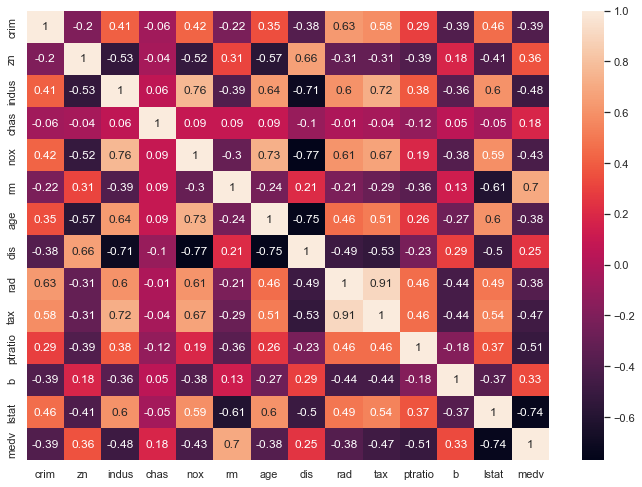

In [66]:
correlation_matrix = Boston_df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [67]:
data_cols = Boston_df.iloc[:, 0:13]
data_cols

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [68]:
target_cols = Boston_df['medv']
target_cols

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [69]:
import numpy as np
from sklearn.model_selection import train_test_split

In [70]:
[X_test_data, X_train_data]=train_test_split(data_cols, test_size=0.80, train_size=0.20 , shuffle=False, random_state=None, stratify=None)

In [71]:
X_test_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.11504,0.0,2.89,0,0.445,6.163,69.6,3.4952,2,276,18.0,391.83,11.34
97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19


In [72]:
X_train_data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
101,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44
104,0.13960,0.0,8.56,0,0.520,6.167,90.0,2.4210,5,384,20.9,392.69,12.33
105,0.13262,0.0,8.56,0,0.520,5.851,96.7,2.1069,5,384,20.9,394.05,16.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [73]:
[Y_test_data, Y_train_data]=train_test_split(target_cols, test_size=0.80, train_size=0.20 , shuffle=False, random_state=None, stratify=None)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train_data, Y_train_data)

LinearRegression()

In [75]:
def evaluation():
  # model evaluation for training set
    y_train_predict = lin_model.predict(X_train_data)
    rmse = (np.sqrt(mean_squared_error(y_train_predict, Y_train_data)))
    r2 = r2_score(Y_train_data, y_train_predict)

    print("The model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test_data)
    rmse = (np.sqrt(mean_squared_error(y_test_predict, Y_test_data)))
    r2 = r2_score(Y_test_data, y_test_predict)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [76]:
evaluation()

The model performance for training set
--------------------------------------
RMSE is 4.952835222224185
R2 score is 0.7466038430634778


The model performance for testing set
--------------------------------------
RMSE is 3.5460811398199286
R2 score is 0.6377122270675023


In [77]:
from sklearn.linear_model import SGDRegressor

In [78]:
lin_model = SGDRegressor()
lin_model.fit(X_train_data, Y_train_data)

SGDRegressor()

In [79]:
evaluation()

The model performance for training set
--------------------------------------
RMSE is 77397794957352.55
R2 score is -6.187987686330031e+25


The model performance for testing set
--------------------------------------
RMSE is 21994018979918.906
R2 score is -1.3936879034683773e+25


https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py

In [86]:
from sklearn.preprocessing import StandardScaler

lin_model.fit(StandardScaler().fit_transform(X_train_data), Y_train_data)

SGDRegressor()

In [81]:
evaluation()

The model performance for training set
--------------------------------------
RMSE is 580.4038068681702
R2 score is -3478.7878675285187


The model performance for testing set
--------------------------------------
RMSE is 219.76342299384643
R2 score is -1390.448578684576


C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
C:\Users\amiryo\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(


In [94]:
X_train_part = pd.DataFrame(np.c_[X_train_data['lstat'], X_train_data['rm']], columns = ['lstat','rm'])
X_test_part = pd.DataFrame(np.c_[X_test_data['lstat'], X_test_data['rm']], columns = ['lstat','rm'])

In [95]:
lin_model = LinearRegression()
lin_model.fit(X_part, Y_train_data)

LinearRegression()

In [96]:
  # model evaluation for training set
y_train_predict = lin_model.predict(X_part)
rmse = (np.sqrt(mean_squared_error(y_train_predict, Y_train_data)))
r2 = r2_score(Y_train_data, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

    # model evaluation for testing set
y_test_predict = lin_model.predict(X_test_part)
rmse = (np.sqrt(mean_squared_error(y_test_predict, Y_test_data)))
r2 = r2_score(Y_test_data, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.955164566244882
R2 score is 0.6336638307671305


The model performance for testing set
--------------------------------------
RMSE is 3.440245487849685
R2 score is 0.6590150528267444
